<a href="https://colab.research.google.com/github/rishitharaj/Deep-Learning/blob/main/SimpleRNN_Model_for_Weather_Temperature_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Building a SimpleRNN Model for Weather Temperature Prediction**

**Objective:** The goal of this assignment is to design, implement, and evaluate a Recurrent Neural Network (RNN) model (using SimpleRNN) to forecast the next day’s temperature based on past weather
data.

Dataset - Use the [Daily Weather Dataset](https://www.kaggle.com/datasets/muthuj7/weather-dataset)

- Example: Daily Weather Dataset – Kaggle

Key Features:
- Date
- Temperature (target variable)
- Humidity
- Wind Speed
- Pressure (optional)

##**Tasks**
###**Part A: Data Understanding and Preprocessing**

**1. Load the dataset and explore:**
- Display first 10 rows.
- Plot temperature trends over time.
- Check for missing values.

In [2]:
import kagglehub

import warnings
warnings.filterwarnings('ignore')

# Download latest version
path = kagglehub.dataset_download("muthuj7/weather-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'weather-dataset' dataset.
Path to dataset files: /kaggle/input/weather-dataset


In [3]:
import os
os.listdir(path)

['weatherHistory.csv']

In [4]:
import pandas as pd
df = pd.read_csv(os.path.join(path, "weatherHistory.csv"))

df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [5]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [6]:
# Convert Date column
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.set_index('Formatted Date')

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Loud Cover                96453 non-null  float64            
 10  Pressure (millibars)      96453 non-null  float64            
 11  Daily Summary  

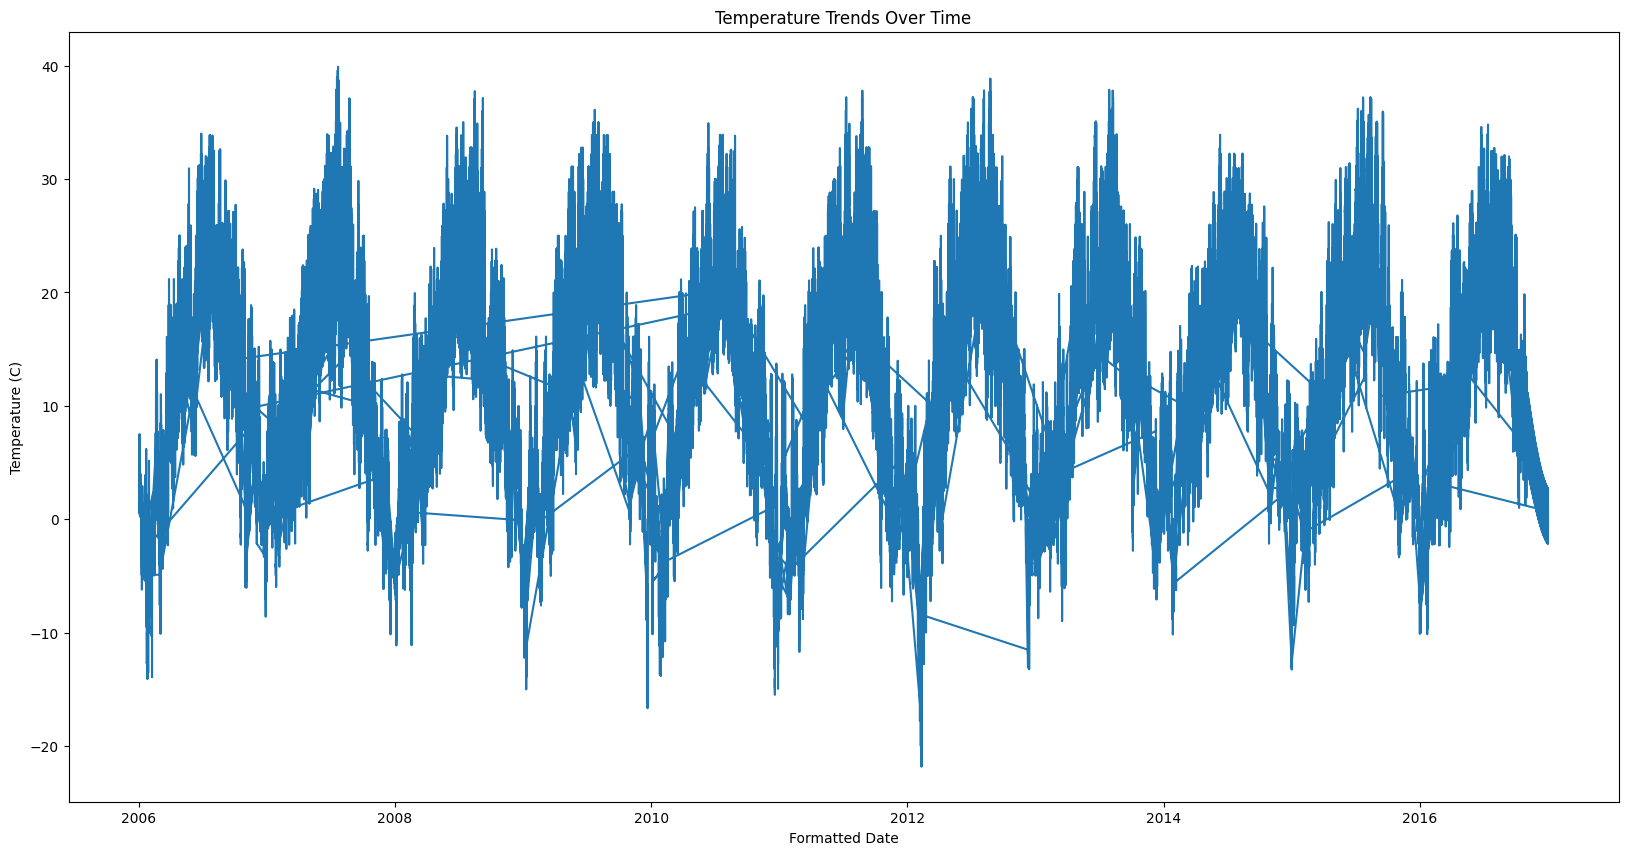

In [8]:
# Plot temperature trends over time.
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(df['Formatted Date'], df['Temperature (C)'])
plt.xlabel('Formatted Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature Trends Over Time')
plt.show()


In [9]:
# Checking for null values

df.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [10]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [11]:
FEATURES = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)'] # Only important features
TARGET = 'Temperature (C)'


**2. Preprocess the data:**
- Handle missing values (impute/remove).
- Normalize values using MinMaxScaler (so RNN converges faster).
- Create input sequences:
  - Use past 7–14 days’ weather data (temperature, humidity, wind speed) as input
  - Target: next day’s temperature.
- Split dataset into train, validation, and test sets.

In [12]:
# Handle missing values (impute/remove)

df.ffill(inplace=True) #forward filling used
df.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [13]:
# Normalize values using MinMaxScaler (so RNN converges faster).

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(df[FEATURES])

In [14]:
# Helper function for 14 days window

import numpy as np

def create_sequences(data, seq_len=14):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len, 0])  # Temperature is first column
    return np.array(X), np.array(y)

SEQ_LEN = 14
X, y = create_sequences(scaled_df, SEQ_LEN)

print(X.shape, y.shape)


(96439, 14, 4) (96439,)


In [15]:
total_samples = X.shape[0]

train_end = int(0.70 * total_samples) # 70% for traing, find the position of last training data
val_end   = int(0.85 * total_samples) # 85-70=15% for validation

X_train = X[:train_end]
y_train = y[:train_end]

X_val = X[train_end:val_end]
y_val = y[train_end:val_end]

X_test = X[val_end:]
y_test = y[val_end:]

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


Train: (67507, 14, 4)
Validation: (14466, 14, 4)
Test: (14466, 14, 4)


In [16]:
assert X_train.shape[0] + X_val.shape[0] + X_test.shape[0] == X.shape[0]
print("Last train sample index:", train_end - 1)
print("First val sample index:", train_end)
print("First test sample index:", val_end)


Last train sample index: 67506
First val sample index: 67507
First test sample index: 81973


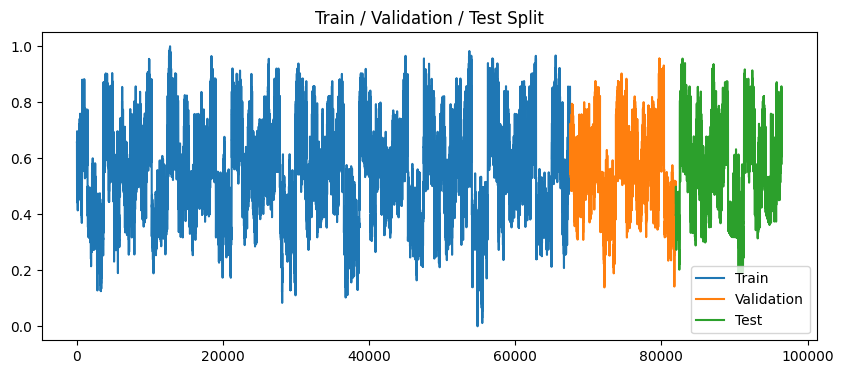

In [17]:
plt.figure(figsize=(10,4))
plt.plot(y_train, label='Train')
plt.plot(range(train_end, val_end), y_val, label='Validation')
plt.plot(range(val_end, total_samples), y_test, label='Test')
plt.title("Train / Validation / Test Split")
plt.legend()
plt.show()


###**Part B: RNN Model Development**

**3. Build a SimpleRNN model using TensorFlow/Keras:**
- Input layer (with shape = sequence length × number of features).
- SimpleRNN layer (e.g., 32–64 units).
- Dropout layer (optional, to avoid overfitting).
- Dense layer with 1 unit (linear activation for regression).

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

model = Sequential([
    SimpleRNN(64, activation='tanh', input_shape=(SEQ_LEN, X.shape[2])),
    Dropout(0.2),
    Dense(1)
])

model.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)

**4. Compile the model:**
- Loss: Mean Squared Error (MSE).
- Optimizer: Adam.
- Metrics: Mean Absolute Error (MAE).

In [19]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

**5. Train the model on training data:**
- Batch size: 32
- Epochs: 50–100
- Use validation data to monitor performance.
- Plot training vs validation loss curves.

In [20]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32
)


Epoch 1/50
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 0.0128 - mae: 0.0739 - val_loss: 6.8177e-04 - val_mae: 0.0191
Epoch 2/50
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0018 - mae: 0.0316 - val_loss: 5.0227e-04 - val_mae: 0.0157
Epoch 3/50
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0011 - mae: 0.0249 - val_loss: 5.2579e-04 - val_mae: 0.0166
Epoch 4/50
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 9.1785e-04 - mae: 0.0220 - val_loss: 4.8408e-04 - val_mae: 0.0162
Epoch 5/50
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 8.5161e-04 - mae: 0.0210 - val_loss: 4.0777e-04 - val_mae: 0.0138
Epoch 6/50
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 7.7669e-04 - mae: 0.0198 - val_loss: 3.8615e-04 - val_mae: 0.0133
Epoch 7/50
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 7.4535e-04 - mae: 0.0193 - val_loss: 4.1509e-04 - val_mae: 0.0140
Epoch 8/50
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 7.4201e-04 - mae: 0.0192 - val_loss: 3.9360e-0

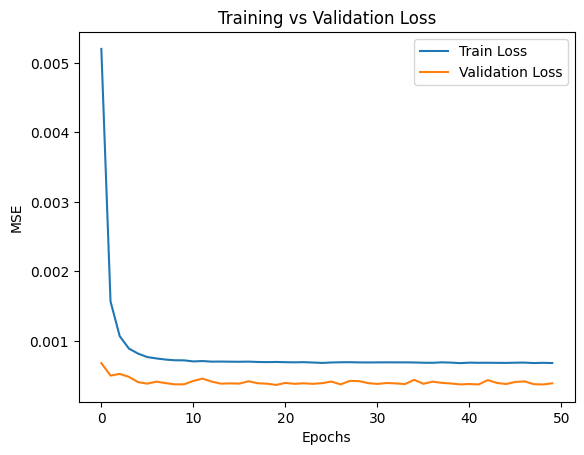

In [21]:
# Plot training vs validation loss curves.

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()


###**Part C: Model Evaluation & Forecasting**

**6. Evaluate the model on the test set:**

- Calculate RMSE, MAE, and R2 score.
- Plot predicted vs actual temperatures for the test period.

In [22]:
# Calculate RMSE, MAE, R2 Score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
RMSE: 0.019054917395348453
MAE: 0.012963529987061075
R2 Score: 0.9826771790073663


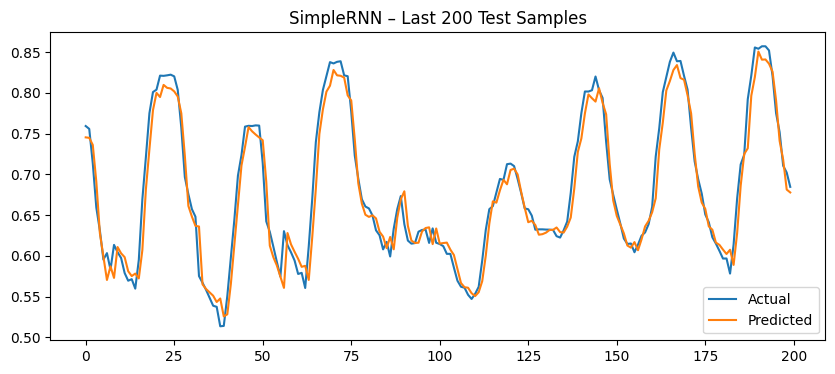

In [29]:
import matplotlib.pyplot as plt

N = 200

plt.figure(figsize=(10,4))
plt.plot(y_test[-N:], label='Actual')
plt.plot(y_pred[-N:], label='Predicted')
plt.legend()
plt.title("SimpleRNN – Last 200 Test Samples")
plt.show()


**7. Forecast the next 7 days of temperature using the trained model and visualize predictions vs recent historical data.**

In [26]:
last_sequence = X_test[-1]
future_predictions = []

for _ in range(7):
    pred = model.predict(last_sequence.reshape(1, SEQ_LEN, X.shape[2]))
    future_predictions.append(pred[0,0])

    # update sequence
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1, 0] = pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [30]:
# future_predictions is a list of scaled temperature values
future_predictions = np.array(future_predictions).reshape(-1, 1)

dummy = np.zeros((len(future_predictions), len(FEATURES)))
dummy[:, 0] = future_predictions.flatten()  # Temperature column

future_temp_c = scaler.inverse_transform(dummy)[:, 0]

print(future_temp_c)


[20.01579855 18.69097715 17.89715792 17.12156576 16.48138884 15.91052554
 15.53959704]


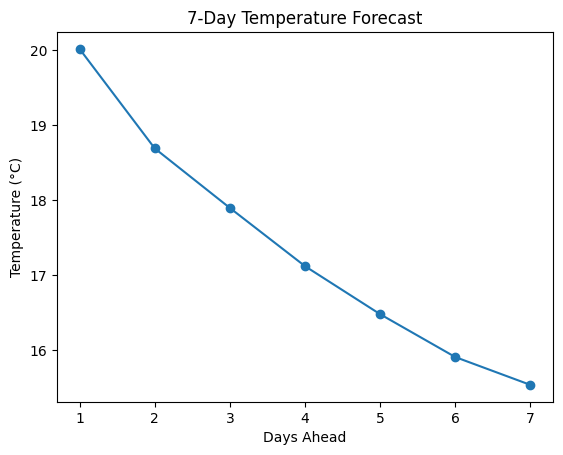

In [31]:
plt.plot(range(1, 8), future_temp_c, marker='o')
plt.xlabel("Days Ahead")
plt.ylabel("Temperature (°C)")
plt.title("7-Day Temperature Forecast")
plt.show()
